<div style="border: 2px solid black; padding: 10px;">
    <h1><u>PROJET : Techniques d’apprentissage artificiel</u></h1>
    <h3>Réalisé par ANTON NELCON Steve & CORTADA Lucas</h3>
    <p><i>Master 1 Informatique et Big DATA - Université Paris 8</i></p>
</div>

# <u>→SUJET : Analyse et prédiction des taux de natalité mondiaux par apprentissage automatique</u>

<div style="border: 2px solid #333; border-radius: 10px; padding: 15px;">
    <h2><u>→Problématique :</u></h2>
    <p>
<p style="font-size:20px;">
Comment modéliser et prédire l'évolution des taux de natalité à l'échelle mondiale en utilisant 
des techniques d'apprentissage automatique, et peut-on identifier des profils de pays similaires 
selon leurs tendances démographiques ?
</p>

    
</div>
<div style="border: 2px solid #000000ff; padding: 10px; background-color: #000000ff;">
    <h3>Objectifs</h3>
    <ol>
        <li>Analyser l'évolution historique des taux de natalité (1960-2020)</li>
        <li>Comparer différents modèles de régression pour prédire les tendances</li>
        <li>Segmenter les pays en groupes selon leurs profils démographiques</li>
        <li>Générer des prédictions pour la décennie 2021-2030</li>
    </ol>
</div>


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b>0. Prétraitement des données</b></h3>
</div>




<span style="background-color: black">→ Importation du Jeu de données</span>


In [11]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=np.inf)

# Importer le jeu de données (utiliser COMMA comme délimiteur, pas SEMICOLON)
data = pd.read_csv('../data/raw/fertility_rate.csv', sep=',')

<span style="background-color: black">→ Collecter les informations du Dataset</span>


In [12]:

# ============================================================
# 📊 Résumé général du dataset
# ============================================================
print("\n" + "="*60)
print("📊 Informations sur le dataset Fertility Rate")
print("="*60)

print(f"➡️ Nombre de lignes    : {data.shape[0]}")
print(f"➡️ Nombre de colonnes  : {data.shape[1]}")

# ============================================================
# 📝 Liste des colonnes disponibles
# ============================================================
print("\n📝 Colonnes disponibles :")
print("-"*40)
for i, col in enumerate(data.columns, start=1):
    print(f"{i}. {col}")

# ============================================================
# 🔎 Aperçu des premières lignes
# ============================================================
print("\n🔎 Aperçu des 5 premières lignes du dataset :")
print("-"*40)
print(data.head(5).to_string(index=False))

# ============================================================
# ✅ Vérification des valeurs manquantes
# ============================================================
print("\n❓ Vérification des valeurs manquantes par colonne :")
print("-"*50)

# Calcul du nombre de valeurs manquantes par colonne
missing_values = data.isnull().sum()

# Affichage formaté, chaque colonne sur une ligne
for col, nb in missing_values.items():
    if nb > 0:
        print(f"⚠️ {col} : {nb} valeurs manquantes")
    else:
        print(f"✅ {col} : aucune valeur manquante")


📊 Informations sur le dataset Fertility Rate
➡️ Nombre de lignes    : 187
➡️ Nombre de colonnes  : 62

📝 Colonnes disponibles :
----------------------------------------
1. Country
2. 1960
3. 1961
4. 1962
5. 1963
6. 1964
7. 1965
8. 1966
9. 1967
10. 1968
11. 1969
12. 1970
13. 1971
14. 1972
15. 1973
16. 1974
17. 1975
18. 1976
19. 1977
20. 1978
21. 1979
22. 1980
23. 1981
24. 1982
25. 1983
26. 1984
27. 1985
28. 1986
29. 1987
30. 1988
31. 1989
32. 1990
33. 1991
34. 1992
35. 1993
36. 1994
37. 1995
38. 1996
39. 1997
40. 1998
41. 1999
42. 2000
43. 2001
44. 2002
45. 2003
46. 2004
47. 2005
48. 2006
49. 2007
50. 2008
51. 2009
52. 2010
53. 2011
54. 2012
55. 2013
56. 2014
57. 2015
58. 2016
59. 2017
60. 2018
61. 2019
62. 2020

🔎 Aperçu des 5 premières lignes du dataset :
----------------------------------------
    Country  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989

<span style="background-color: black">→Aperçu des premières colonnes et lignes </span>


In [13]:
# ============================================================
# 📝 Afficher les noms de colonnes
# ============================================================
print("\n📝 Liste des colonnes disponibles :")
print("-"*50)
for i, col in enumerate(data.columns, start=1):
    print(f"{i}. {col}")

# ============================================================
# 🔎 Aperçu des premières lignes
# ============================================================
print("\n🔎 Aperçu des 10 premières lignes du dataset :")
print("-"*50)
print(data.head(10).to_string(index=False))




📝 Liste des colonnes disponibles :
--------------------------------------------------
1. Country
2. 1960
3. 1961
4. 1962
5. 1963
6. 1964
7. 1965
8. 1966
9. 1967
10. 1968
11. 1969
12. 1970
13. 1971
14. 1972
15. 1973
16. 1974
17. 1975
18. 1976
19. 1977
20. 1978
21. 1979
22. 1980
23. 1981
24. 1982
25. 1983
26. 1984
27. 1985
28. 1986
29. 1987
30. 1988
31. 1989
32. 1990
33. 1991
34. 1992
35. 1993
36. 1994
37. 1995
38. 1996
39. 1997
40. 1998
41. 1999
42. 2000
43. 2001
44. 2002
45. 2003
46. 2004
47. 2005
48. 2006
49. 2007
50. 2008
51. 2009
52. 2010
53. 2011
54. 2012
55. 2013
56. 2014
57. 2015
58. 2016
59. 2017
60. 2018
61. 2019
62. 2020

🔎 Aperçu des 10 premières lignes du dataset :
--------------------------------------------------
            Country  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  20

<span style="background-color: black">→ Afficher uniquement les données de la France </span>


In [14]:
# Afficher les noms de colonnes
print(data.columns)

# Afficher uniquement la 61ème ligne
print(data.iloc[61])   # France


Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Country    France
1960         2.85
1961         2.87
1962         2.89
1963         2.89
            ...  
2016         1.92
2017         1.89
2018         1.87
2019         1.86
2020         1.83
Name: 61, Length: 62, dtype: object


<span style="background-color: black">→ Structure de la  Dataset</span>


In [ ]:

# Charger avec délimiteur CORRECT
# Le fichier utilise COMMA (,) pas SEMICOLON (;)
data = pd.read_csv('../data/raw/fertility_rate.csv', sep=',')

print("\n" + "="*70)
print("📊 STRUCTURE DU DATASET")
print("="*70)

print(f"\n✅ Forme du dataset : {data.shape[0]} pays × {data.shape[1]} colonnes")
print(f"\n📝 Colonnes trouvées ({len(data.columns)} total) :")
print("-"*70)

# Afficher les colonnes
for i, col in enumerate(data.columns[:10]):
    col_type = "PAYS" if not col.isdigit() else "ANNÉE"
    print(f"  {i+1}. '{col}' ({col_type})")
if data.shape[1] > 10:
    print(f"  ... et {data.shape[1] - 10} colonnes supplémentaires")

print(f"\n🌍 Première colonne (identifiant pays) : '{data.columns[0]}'")
print(f"📅 Colonnes années (échantillon) : {[c for c in data.columns[1:6]]}")

# ============================================================
# ✅ Identifier les colonnes automatiquement
# ============================================================
id_col = data.columns[0]  # Première colonne = pays
year_cols = [c for c in data.columns if c.isdigit()]

print(f"\n🔧 Configuration détectée :")
print(f"  - Colonne identifiant : '{id_col}'")
print(f"  - Colonnes années : {len(year_cols)} colonnes ({year_cols[0]}–{year_cols[-1]})")

# ============================================================
# ✅ Transformer en format LONG
# ============================================================
df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

print(f"\n📊 Après transformation LONG :")
print(f"  - Forme : {df_long.shape}")
print(f"  - Colonnes : {df_long.columns.tolist()}")
print(f"  - Premiers pays-années :")
print(df_long.head(10).to_string(index=False))

print("\n✅ Prêt pour l'analyse !")


📊 STRUCTURE DU DATASET

✅ Forme du dataset : 187 pays × 62 colonnes

📝 Colonnes trouvées (62 total) :
----------------------------------------------------------------------
  1. 'Country' (PAYS)
  2. '1960' (ANNÉE)
  3. '1961' (ANNÉE)
  4. '1962' (ANNÉE)
  5. '1963' (ANNÉE)
  6. '1964' (ANNÉE)
  7. '1965' (ANNÉE)
  8. '1966' (ANNÉE)
  9. '1967' (ANNÉE)
  10. '1968' (ANNÉE)
  ... et 52 colonnes supplémentaires

🌍 Première colonne (identifiant pays) : 'Country'
📅 Colonnes années (échantillon) : ['1960', '1961', '1962', '1963', '1964']

🔧 Configuration détectée :
  - Colonne identifiant : 'Country'
  - Colonnes années : 61 colonnes (1960–2020)

📊 Après transformation LONG :
  - Forme : (11407, 3)
  - Colonnes : ['Country', 'Year', 'FertilityRate']
  - Premiers pays-années :
            Country  Year  FertilityRate
             _World  1960           4.98
        Afghanistan  1960           7.45
            Albania  1960           6.49
            Algeria  1960           7.52
            

<span style="background-color: black">→ Tableau : Filtrage de tout les pays (1960-2020)</span>


In [16]:
# ============================================================
# 🌍 Filtrer tous les pays (1960–2020)
# ============================================================
df_all = df_long[df_long["Year"].between(1960, 2020)]

# ============================================================
# 📊 Tableau : Fertilité par pays (1960–2020)
# ============================================================
print("\n📊 Évolution du taux de fertilité par pays (1960–2020)")
print("="*70)
print(f"{'Pays':<20} {'Année':<10} {'Fertilité (nbr enfants/femme)':<10}")
print("-"*70)

# Affichage formaté ligne par ligne
for _, row in df_all.iterrows():
    print(f"{row['Country']:<20} {row['Year']:<10} {row['FertilityRate']:<10}")





📊 Évolution du taux de fertilité par pays (1960–2020)
Pays                 Année      Fertilité (nbr enfants/femme)
----------------------------------------------------------------------
_World               1960       4.98      
Afghanistan          1960       7.45      
Albania              1960       6.49      
Algeria              1960       7.52      
Angola               1960       6.71      
Antigua and Barbuda  1960       4.43      
Arab World           1960       6.98      
Argentina            1960       3.11      
Armenia              1960       4.79      
Aruba                1960       4.82      
Australia            1960       3.45      
Austria              1960       2.69      
Azerbaijan           1960       5.88      
Bahamas              1960       4.5       
Bahrain              1960       7.09      
Bangladesh           1960       6.73      
Barbados             1960       4.33      
Belarus              1960       2.67      
Belgium              1960       2.54  

<span style="background-color: black">→ Tabeau : Filtrage pour la France uniquement</span>


In [17]:
# ============================================================
# 🇫🇷 Filtrer uniquement la France (1960–2020)
# ============================================================
df_france = df_long[(df_long["Country"] == "France") &
                    (df_long["Year"].between(1960, 2020))]

# ============================================================
# 📊 Tableau : Fertilité en France (1960–2020)
# ============================================================
print("\n📊 Évolution du taux de fertilité en France (1960–2020)")
print("="*60)
print(f"{'Pays':<15} {'Année':<10} {'Fertilité (nbr enfants/femmes)':<10}")
print("-"*60)

# Affichage formaté ligne par ligne
for _, row in df_france.iterrows():
    print(f"{row['Country']:<15} {row['Year']:<10} {row['FertilityRate']:<10}")



📊 Évolution du taux de fertilité en France (1960–2020)
Pays            Année      Fertilité (nbr enfants/femmes)
------------------------------------------------------------
France          1960       2.85      
France          1961       2.87      
France          1962       2.89      
France          1963       2.89      
France          1964       2.87      
France          1965       2.84      
France          1966       2.8       
France          1967       2.75      
France          1968       2.69      
France          1969       2.62      
France          1970       2.55      
France          1971       2.47      
France          1972       2.38      
France          1973       2.28      
France          1974       2.18      
France          1975       2.09      
France          1976       2.01      
France          1977       1.94      
France          1978       1.89      
France          1979       1.87      
France          1980       1.85      
France          1981       

<span style="background-color: black">→ Evolution du taux de fertilité mondiale</span>


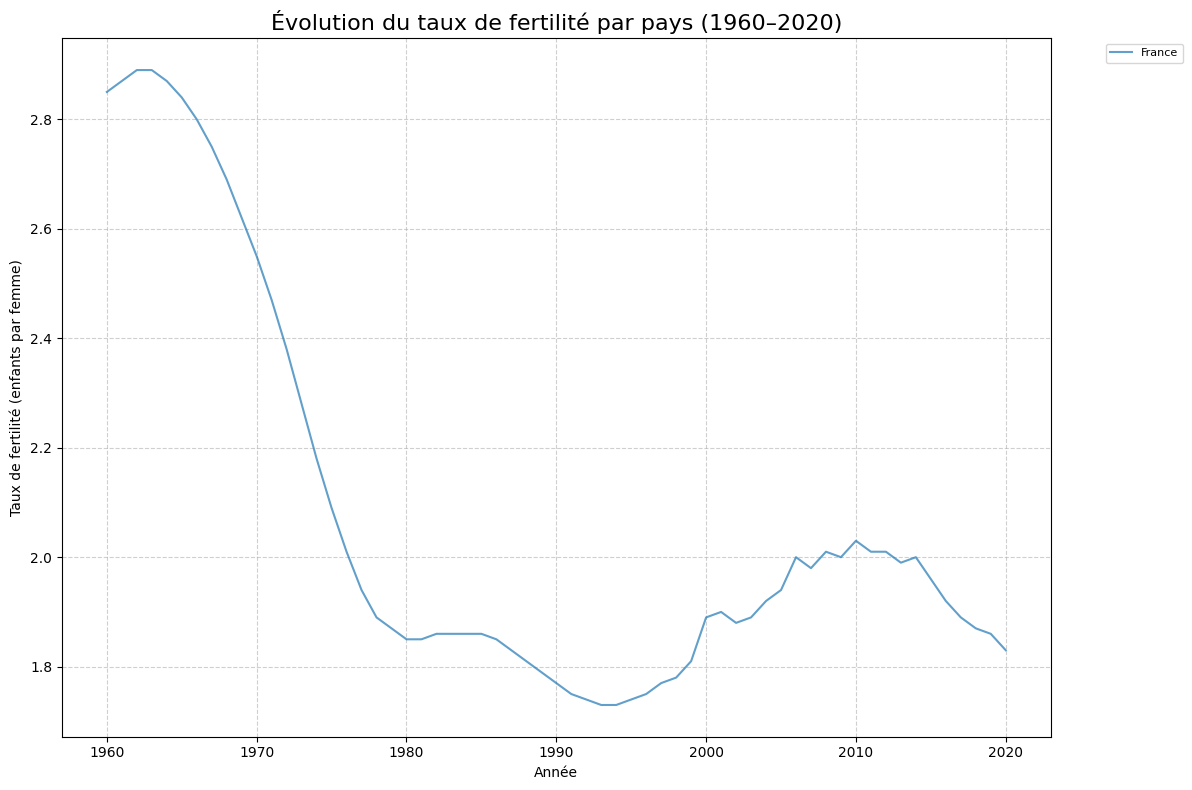

In [21]:
# ============================================================
# 📈 Graphique multi-pays
# ============================================================
plt.figure(figsize=(12,8))

# Boucle sur chaque pays
for country, df_country in df_country.groupby(id_col):
    plt.plot(df_country["Year"], df_country["FertilityRate"], 
             label=country, alpha=0.7)

# Mise en forme
plt.title("Évolution du taux de fertilité par pays (1960–2020)", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<span style="background-color: black">→ Evolution du taux de fertilité en France</span>


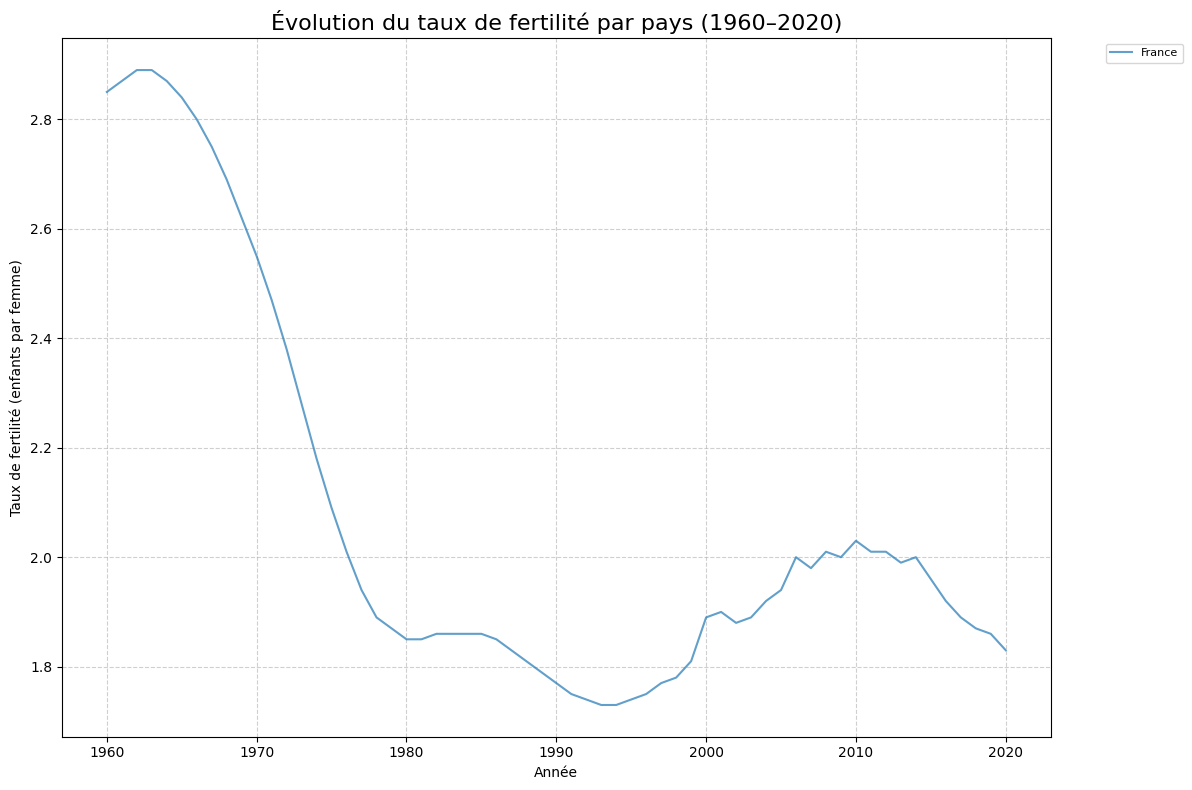

In [22]:
# ============================================================
# 📈 Graphique multi-pays
# ============================================================
plt.figure(figsize=(12,8))

# Boucle sur chaque pays
for country, df_country in df_france.groupby(id_col):
    plt.plot(df_country["Year"], df_france["FertilityRate"], 
             label=country, alpha=0.7)

# Mise en forme
plt.title("Évolution du taux de fertilité par pays (1960–2020)", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b>Objectif 1. Analyser l'évolution historique des taux de natalité (1960-2020)</b></h3>
</div>








<span style="background-color: black">→ Graphique : évolution du taux de fertilité moyen mondial (1960-2020)</span>


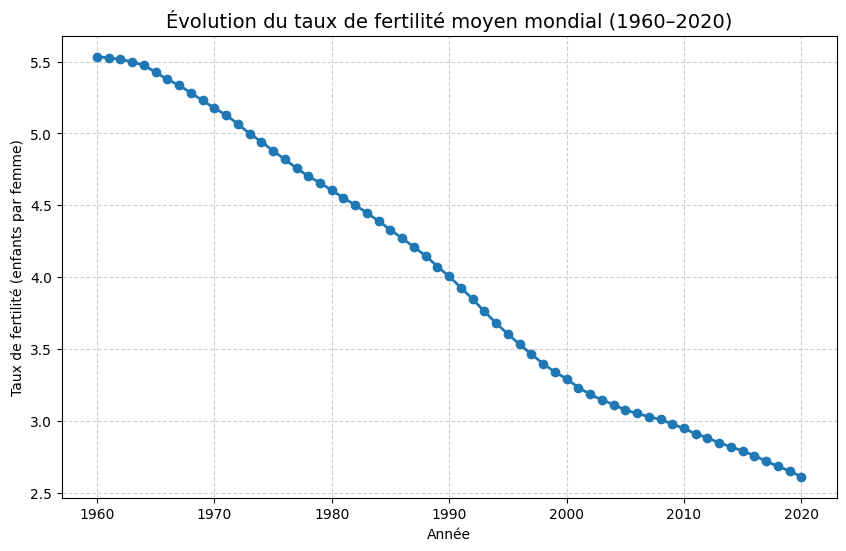

In [ ]:

# Graphique : évolution moyenne mondiale
world_mean = df_long.groupby("Year")["FertilityRate"].mean()

plt.figure(figsize=(10,6))
plt.plot(world_mean.index, world_mean.values, marker="o", color="tab:blue", linewidth=2)
plt.title("Évolution du taux de fertilité moyen mondial (1960–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



<span style="background-color: yellow; color: BLACK"><b>Remarque :</b></span>

Ce graphique illustre l’évolution du taux de fertilité moyen mondial par rapport aux années.

On observe une tendance générale à la baisse du taux de fertilité moyen mondial sur toute la période.

Dans les années 1960, le taux moyen se situait autour de 5 enfants par femme, ce qui reflète une natalité élevée dans la majorité des pays.

À partir des années 1970–1980, la courbe montre une diminution progressive et continue, liée à la transition démographique, à l’urbanisation, et à l’amélioration de l’accès à l’éducation et à la santé.

En 2020, le taux moyen mondial est descendu à environ 2,4 enfants par femme.

En conlusio : La natalité mondiale baisse de manière continue depuis 1960.

<span style="background-color: black">→ Graphique : évolution du taux de fertilité en France (1960-2020)</span>
 

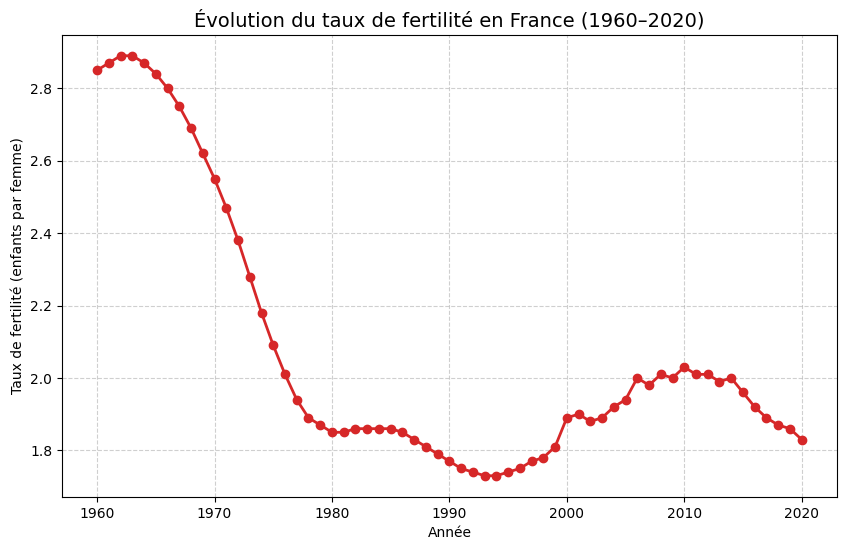

In [ ]:
#Graphique : évolution du taux de fertilité en France (1960-2020)
plt.figure(figsize=(10,6))
plt.plot(df_france["Year"], df_france["FertilityRate"], marker="o", color="tab:red", linewidth=2)
plt.title("Évolution du taux de fertilité en France (1960–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<span style="background-color: yellow; color: BLACK"><b>Remarque :</b></span>

Ce graphique illustre l’évolution du taux de fertilité en France par rapport aux années.

On observe une tendance générale à la baisse du taux de fertilité depuis 1960.

Dans les années 1960, le taux se situait autour de 2,7 enfants par femme, ce qui correspond à une natalité relativement élevée.

À partir des années 1970, la courbe montre une diminution progressive, liée à la transition démographique, à l’évolution des modes de vie, et à l’accès accru à la contraception et à l’éducation.

Dans les années 1990–2000, le taux se stabilise autour de 1,8 à 2 enfants par femme, reflétant une natalité modérée mais relativement stable par rapport à d’autres pays européens.

En 2020, le taux de fertilité en France est d’environ 1,8 enfant par femme.

En conclusion, la natalité en France baisse sur le long terme.

<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 2. Comparer différents modèles de régression pour prédire les tendances</b></h3>
</div>


<span style="background-color: black">→ **Méthode : Régression Linéaire Multiple**</span>


In [ ]:
from pathlib import Path
import subprocess
import sys
import pickle

from ProjetNatalite.config import MODELS_DIR

print("Lancement du script d'entraînement pour créer models/model.pkl...")
subprocess.run([sys.executable, "-m", "ProjetNatalite.modeling.train"], check=True)

model_path = MODELS_DIR / "model.pkl"
if model_path.exists():
    with open(model_path, "rb") as f:
        model = pickle.load(f)
    print(f"Modèle sauvegardé : {model_path}")
    print("Contenu du modèle chargé :", model)
else:
    print(f"Aucun fichier modèle trouvé à : {model_path}")


2025-11-17 14:43:03.977 | INFO     | ProjetNatalite.config:<module>:11 - PROJ_ROOT path is: C:\Users\anton\OneDrive\Bureau\ProjetNatalite


Lancement du script d'entraînement pour créer models/model.pkl...
Modèle sauvegardé : C:\Users\anton\OneDrive\Bureau\ProjetNatalite\models\model.pkl
Contenu du modèle chargé : {'name': 'dummy_model', 'version': 1}


<span style="background-color: black">→ **Méthode : Régression Linéaire Multiple par pays**</span>


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
# 📥 Détection automatique des colonnes
# ============================================================
id_col = [c for c in data.columns if not c.isdigit()][0]   # colonne pays
year_cols = [c for c in data.columns if c.isdigit()]       # colonnes années

# Transformation en format long
df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

# ============================================================
# 🌍 Régression linéaire pour chaque pays
# ============================================================
results = []

for country, df_country in df_long.groupby(id_col):
    X = df_country[["Year"]].values
    y = df_country["FertilityRate"].values

    # Vérifier la taille du dataset
    if len(df_country) > 10:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    # Créer et entraîner le modèle
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    coef = model.coef_[0]
    intercept = model.intercept_
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Country": country,
        "Coefficient": coef,
        "Intercept": intercept,
        "RMSE": rmse,
        "R2": r2
    })

# ============================================================
# 📊 Résultats globaux
# ============================================================
df_results = pd.DataFrame(results)
print("\n📊 Résumé du modèle de Régression Linéaire par pays :")
print(df_results.head(10))   # afficher les 10 premiers pays
import matplotlib.pyplot as plt

# Filtrer uniquement les années 1960–2020
df_filtered = df_long[(df_long["Year"] >= 1960) & (df_long["Year"] <= 2020)]



📊 Résumé du modèle de Régression Linéaire par pays :
               Country  Coefficient   Intercept      RMSE        R2
0          Afghanistan    -0.040922   88.387075  0.702546  0.539939
1              Albania    -0.081025  164.455280  0.401692  0.936664
2              Algeria    -0.112576  229.023627  0.785684  0.866409
3               Angola    -0.029365   65.298378  0.404114  0.591371
4  Antigua and Barbuda    -0.036239   74.643008  0.420307  0.744142
5           Arab World    -0.082088  168.515036  0.313606  0.955906
6            Argentina    -0.019066   40.767993  0.149129  0.834574
7              Armenia    -0.043172   88.378171  0.397312  0.815652
8                Aruba    -0.036301   74.646038  0.485202  0.688505
9            Australia    -0.023372   48.629148  0.283741  0.717473


<span style="background-color: black">→ **Visualisation du Méthode : Régression Linéaire Multiple**</span>



📊 Résumé du modèle de Régression Linéaire :
➡️ Coefficient (pente) : -0.0140
   → Chaque année supplémentaire fait baisser le taux de fertilité de 0.0140 enfants/femme en moyenne.

➡️ Intercept (ordonnée à l'origine) : 29.9391
   → Valeur théorique du taux de fertilité si l'année = 0 

➡️ RMSE (erreur moyenne) : 0.248
   → Plus le RMSE est petit, plus les prédictions sont proches des valeurs réelles.

➡️ R² (variance expliquée) : 0.546
   → Proportion de la variation du taux de fertilité expliquée par le modèle.


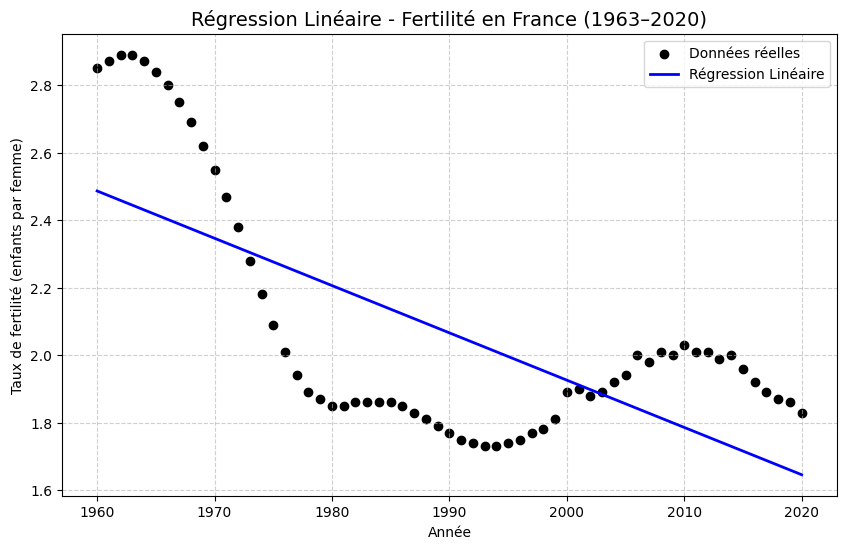

In [ ]:
# Détection automatique de la colonne pays
id_col = [c for c in data.columns if not c.isdigit()][0]
year_cols = [c for c in data.columns if c.isdigit()]

# Transformation en format long
df_long = data.melt(id_vars=[id_col], value_vars=year_cols,
                    var_name="Year", value_name="FertilityRate")
df_long["Year"] = df_long["Year"].astype(int)

# Filtrer France (normalisation pour éviter espaces/majuscules)
df_france = df_long[df_long[id_col].str.strip().str.lower().str.contains("france")].dropna()

# Variables explicatives et cible
X = df_france[["Year"]].values
y = df_france["FertilityRate"].values

# Vérifier la taille du dataset
if len(df_france) > 10:
    # Séparer en train/test si assez de données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    # Sinon utiliser tout le dataset
    X_train, X_test, y_train, y_test = X, X, y, y

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# ============================================================
# 📊 Résultats du modèle de Régression Linéaire
# ============================================================
coef = model.coef_[0]
intercept = model.intercept_

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Résumé du modèle de Régression Linéaire :")
print("="*60)
print(f"➡️ Coefficient (pente) : {coef:.4f}")
print("   → Chaque année supplémentaire fait baisser le taux de fertilité de "
      f"{abs(coef):.4f} enfants/femme en moyenne.")

print(f"\n➡️ Intercept (ordonnée à l'origine) : {intercept:.4f}")
print("   → Valeur théorique du taux de fertilité si l'année = 0 ")

print(f"\n➡️ RMSE (erreur moyenne) : {rmse:.3f}")
print("   → Plus le RMSE est petit, plus les prédictions sont proches des valeurs réelles.")

print(f"\n➡️ R² (variance expliquée) : {r2:.3f}")
print("   → Proportion de la variation du taux de fertilité expliquée par le modèle.")
print("="*60)

# ============================================================
# 📈 Visualisation
# ============================================================
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="black", label="Données réelles")
plt.plot(X, model.predict(X), color="blue", linewidth=2, label="Régression Linéaire")
plt.title("Régression Linéaire - Fertilité en France (1963–2020)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants par femme)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<span style="background-color: yellow; color: black"><b>**Remarque :**</b></span>

 Ce graphique s’intitule "Régression Linéaire - Fertilité en France (1963–2020)". Il représente l’évolution du taux de fertilité, c’est-à-dire le nombre moyen d’enfants par femme, en France entre 1963 et 2020.

L’axe horizontal indique les années, allant de 1963 à 2020. L’axe vertical montre le taux de fertilité, exprimé en enfants par femme.

Les points noirs correspondent aux données réelles observées chaque année. Ils montrent que le taux de fertilité était supérieur à 2.8 enfants par femme dans les années 1960, puis a diminué progressivement au fil du temps.

Une ligne bleue représente une régression linéaire, c’est-à-dire une tendance mathématique qui résume l’évolution globale du taux de fertilité. Cette ligne montre une baisse continue, atteignant un niveau inférieur à 1.8 enfants par femme en 2020.


<span style="background-color: black">→ **Random Forest Classification**</span>


In [ ]:
# ============================
# 🌲 Random Forest Classification
# ============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# --------------------------------
# 1) Exemple de dataset (remplace par le tien)
# --------------------------------
# X : variables explicatives (ex. couleur, taille, forme…)
# y : classes (ex. A/B/C)
# Ici on simule un dataset multiclasses pour la démo :
rng = np.random.RandomState(42)
n = 500
X = pd.DataFrame({
    "feature_1": rng.normal(loc=0, scale=1, size=n),
    "feature_2": rng.normal(loc=2, scale=1.5, size=n),
    "feature_3": rng.uniform(low=-1, high=1, size=n),
})
# Génère des classes en fonction d'une règle (juste pour l'exemple)
y = np.where(X["feature_1"] + 0.5 * X["feature_2"] > 2.0, "Classe_A",
    np.where(X["feature_2"] - X["feature_3"] < 1.0, "Classe_B", "Classe_C"))

# --------------------------------
# 2) Train / Test split
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Optionnel : mise à l’échelle (utile si tu mélanges avec d’autres modèles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# 3) Modèle Random Forest (vote majoritaire)
# --------------------------------
rf = RandomForestClassifier(
    n_estimators=300,    # nombre d'arbres
    max_depth=None,      # profondeur libre (tu peux limiter ex. 10)
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt", # sous-échantillonnage des features (renforce la diversité des arbres)
    bootstrap=True,      # sous-échantillonnage des exemples
    random_state=42,
    n_jobs=-1            # parallélisation
)

# Entraînement
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)  # probabilités par vote des arbres

# --------------------------------
# 4) Évaluation
# --------------------------------
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)

print("\n📊 Résultats Random Forest (Classification)")
print("="*60)
print(f"➡️ Accuracy           : {acc:.3f}")
print("\n➡️ Classification report :\n", report)
print("➡️ Confusion matrix :\n", cm)

# Cross-validation (robuste)
cv_scores = cross_val_score(rf, scaler.transform(X), y, cv=5, scoring="accuracy", n_jobs=-1)
print("\n➡️ Cross-val accuracy (5-fold) :")
print(f"   Moyenne = {cv_scores.mean():.3f} | Écart-type = {cv_scores.std():.3f}")

# --------------------------------
# 5) Interprétation : importance des features
# --------------------------------
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n➡️ Importance des variables (feature_importances_):")
print(importances)

# --------------------------------
# 6) Visualiser les probabilités et la composition des votes
# --------------------------------
# Exemple : afficher les 5 premières prédictions avec leurs probabilités
proba_df = pd.DataFrame(y_proba, columns=rf.classes_)
proba_df["predicted"] = y_pred
proba_df["true"] = y_test  
print("\n➡️ Exemple de probabilités par classe (vote des arbres) :")
print(proba_df.head(5))





📊 Résultats Random Forest (Classification)
➡️ Accuracy           : 0.976

➡️ Classification report :
               precision    recall  f1-score   support

    Classe_A      0.957     0.957     0.957        23
    Classe_B      1.000     0.933     0.966        30
    Classe_C      0.973     1.000     0.986        72

    accuracy                          0.976       125
   macro avg      0.976     0.963     0.969       125
weighted avg      0.976     0.976     0.976       125

➡️ Confusion matrix :
 [[22  0  1]
 [ 1 28  1]
 [ 0  0 72]]

➡️ Cross-val accuracy (5-fold) :
   Moyenne = 0.938 | Écart-type = 0.025

➡️ Importance des variables (feature_importances_):
feature_2    0.503463
feature_1    0.307287
feature_3    0.189250
dtype: float64

➡️ Exemple de probabilités par classe (vote des arbres) :
   Classe_A  Classe_B  Classe_C predicted      true
0  0.050000  0.126667  0.823333  Classe_C  Classe_C
1  0.040000  0.050000  0.910000  Classe_C  Classe_C
2  0.013333  0.830000  0.156667  

<span style="background-color: black">→ **Matrice de Confusion -Random Forest**</span>



📊 Matrice de confusion (valeurs brutes) :
 [[22  0  1]
 [ 1 28  1]
 [ 0  0 72]]

📊 Rapport de classification :
               precision    recall  f1-score   support

    Classe_A       0.96      0.96      0.96        23
    Classe_B       1.00      0.93      0.97        30
    Classe_C       0.97      1.00      0.99        72

    accuracy                           0.98       125
   macro avg       0.98      0.96      0.97       125
weighted avg       0.98      0.98      0.98       125



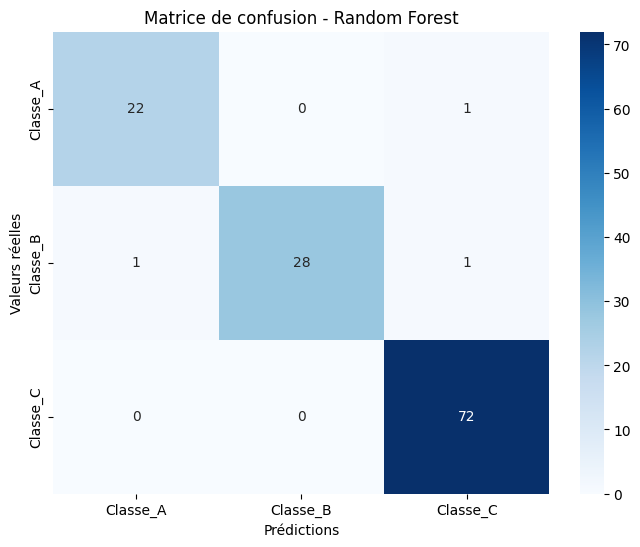

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ============================================================
# 1) Exemple de dataset (remplace par le tien)
# ============================================================
rng = np.random.RandomState(42)
n = 500
X = pd.DataFrame({
    "feature_1": rng.normal(loc=0, scale=1, size=n),
    "feature_2": rng.normal(loc=2, scale=1.5, size=n),
    "feature_3": rng.uniform(low=-1, high=1, size=n),
})
y = np.where(X["feature_1"] + 0.5 * X["feature_2"] > 2.0, "Classe_A",
    np.where(X["feature_2"] - X["feature_3"] < 1.0, "Classe_B", "Classe_C"))

# ============================================================
# 2) Train/Test split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ============================================================
# 3) Random Forest Classifier
# ============================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ============================================================
# 4) Matrice de confusion
# ============================================================
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
print("\n📊 Matrice de confusion (valeurs brutes) :\n", cm)

# Rapport détaillé
print("\n📊 Rapport de classification :\n", classification_report(y_test, y_pred))

# ============================================================
# 5) Visualisation Heatmap
# ============================================================
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


<span style="background-color: black">→ **Clustering Algorithme principal : K-Means (Non supervisé)**</span>


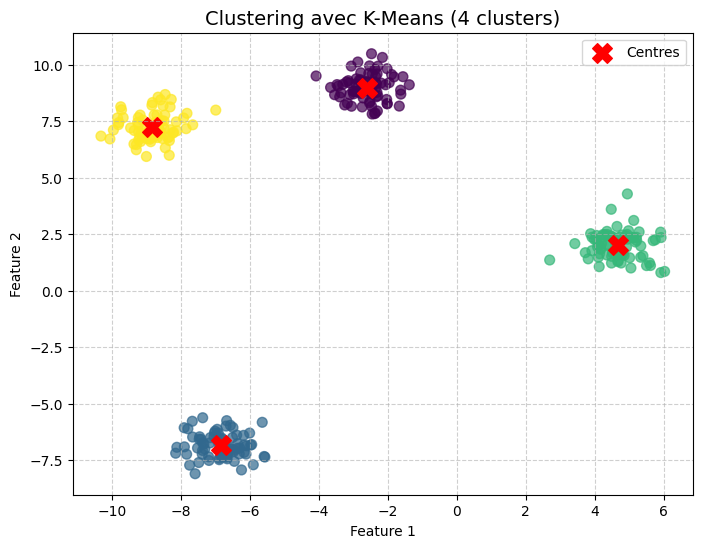

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# ============================================================
# 1) Génération d’un dataset d’exemple (remplace par le tien)
# ============================================================
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# ============================================================
# 2) Application de K-Means
# ============================================================
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Centres des clusters
centers = kmeans.cluster_centers_

# ============================================================
# 3) Visualisation
# ============================================================
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centres')
plt.title("Clustering avec K-Means (4 clusters)", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<span style="background-color: black">→ **Régression avec GradientBoostingRegressor**</span>


In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(
    loss="squared_error",      # perte pour régression
    learning_rate=0.05,        # ν
    n_estimators=600,          # plus d'arbres avec petit ν
    max_depth=3,               # interactions modestes
    subsample=0.8,             # stochastic GB
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.3344636979981024


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>
 La métrique choisie est MAE (Mean Absolute Error), qui mesure l’écart moyen entre prédictions et valeurs réelles.

<span style="background-color: black">→ **Classification avec GradientBoostingClassifier**</span>


In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(
    loss="log_loss",           # logistic loss
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbc.fit(X_train, y_train)
proba = gbc.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, proba))


ROC-AUC: 0.9868246271045387


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>
 un modèle qui prédit des classes binaires avec une probabilité.

Régression - MAE: 0.3344636979981024


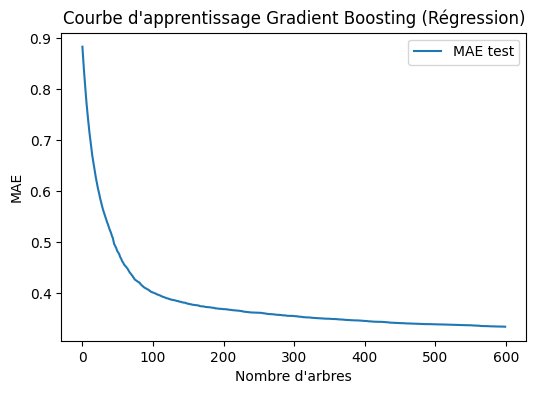

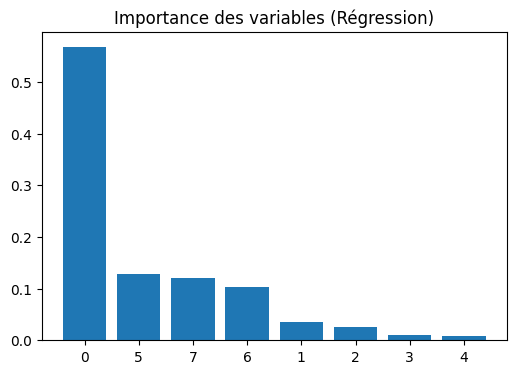

Classification - ROC-AUC: 0.9868246271045387


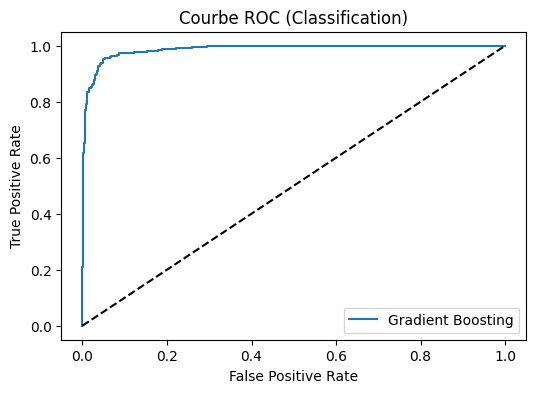

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# ============================
# 1. Régression : California Housing
# ============================

# Charger dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.05,
    n_estimators=600,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("Régression - MAE:", mean_absolute_error(y_test, y_pred))

# Courbe d’apprentissage (MAE vs nombre d’arbres)
test_score = gbr.staged_predict(X_test)
mae_scores = [mean_absolute_error(y_test, y_pred) for y_pred in test_score]

plt.figure(figsize=(6,4))
plt.plot(mae_scores, label="MAE test")
plt.xlabel("Nombre d'arbres")
plt.ylabel("MAE")
plt.title("Courbe d'apprentissage Gradient Boosting (Régression)")
plt.legend()
plt.show()


# Importance des variables
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), indices)
plt.title("Importance des variables (Régression)")
plt.show()


# ============================
# 2. Classification : Dataset synthétique
# ============================

# Générer dataset artificiel
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Gradient Boosting Classifier
gbc = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gbc.fit(X_train, y_train)
proba = gbc.predict_proba(X_test)[:, 1]

print("Classification - ROC-AUC:", roc_auc_score(y_test, proba))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Gradient Boosting")
plt.plot([0,1], [0,1], 'k--')  # diagonale aléatoire
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC (Classification)")
plt.legend()
plt.show()


 <span style="background-color: yellow; color: black"><b>Remarque :</b></span>

→Courbe d’apprentissage (Régression) :Ce graphique montre comment l’erreur moyenne absolue (MAE) évolue au fur et à mesure que de nouveaux arbres sont ajoutés. Une courbe qui descend rapidement puis se stabilise indique que le modèle apprend efficacement sans trop sur‑adapter.

 →Importance des variables (Régression) : Ce graphique illustre quelles variables du dataset influencent le plus les prédictions du modèle. Les barres les plus hautes correspondent aux features les plus déterminantes dans l’explication des prix des maisons.

 → Courbe ROC (Classification) :La courbe ROC compare le taux de vrais positifs au taux de faux positifs pour différents seuils de décision. Plus la courbe s’approche du coin supérieur gauche, meilleure est la capacité du modèle à distinguer les deux classes. La diagonale en pointillés représente un modèle aléatoire.


<span style="background-color: black">→ **Decision Tree Regressor**</span>


MAE: 0.5222592972077786


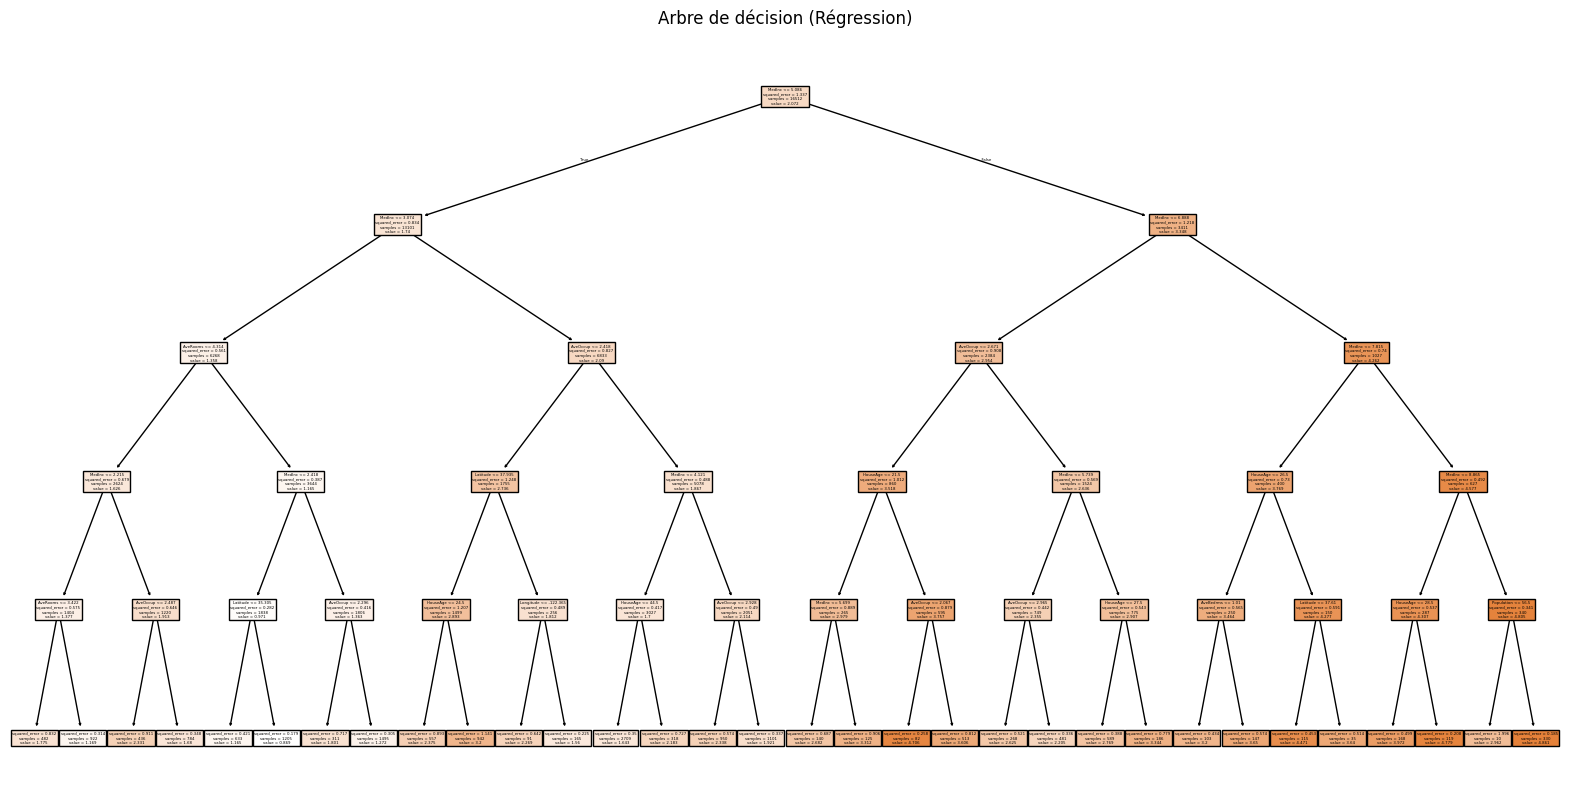

In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

# ============================
# 1. Charger le dataset
# ============================
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 2. Créer et entraîner le modèle
# ============================
dtr = DecisionTreeRegressor(
    criterion="squared_error",  # fonction de perte
    max_depth=5,                # profondeur max de l'arbre
    min_samples_leaf=10,        # au moins 10 échantillons par feuille
    random_state=42
)
dtr.fit(X_train, y_train)

# ============================
# 3. Évaluer le modèle
# ============================
y_pred = dtr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


# ============================
# 4. Visualiser l'arbre
# ============================
plt.figure(figsize=(20,10))
plot_tree(dtr, filled=True, feature_names=fetch_california_housing().feature_names)
plt.title("Arbre de décision (Régression)")
plt.show()


<span style="background-color: black">→ **Ridge Regression (L2) et Lasso Regression (L1)**</span>


Ridge MAE: 0.5332039182571576


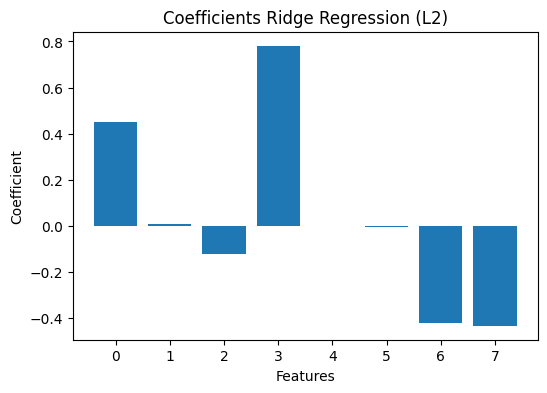

Lasso MAE: 0.5362504645663364


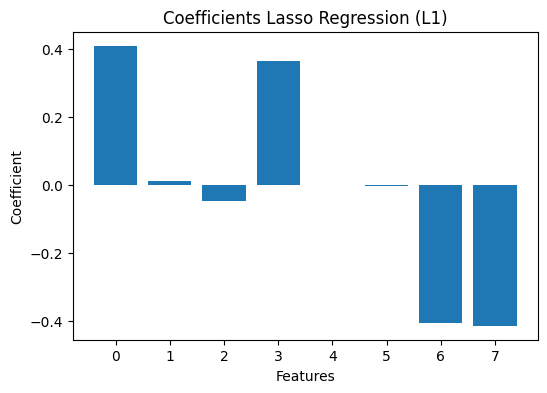

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error

# Charger dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 1. Ridge Regression (L2)
# ============================
ridge = Ridge(alpha=1.0)  # alpha = intensité de la régularisation
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))

plt.figure(figsize=(6,4))
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.title("Coefficients Ridge Regression (L2)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()

# ============================
# 2. Lasso Regression (L1)
# ============================
lasso = Lasso(alpha=0.01)  # alpha plus petit car L1 est plus agressif
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))

plt.figure(figsize=(6,4))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.title("Coefficients Lasso Regression (L1)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()


<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 3. Segmenter les pays en groupes selon leurs profils démographiques</b></h3>
</div>


<span style="background-color: black">→ **Diviser les pays selon leur profils démographiques**</span>


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger ton fichier (ex: fertitily_rate.csv)
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Choisir les colonnes numériques pertinentes
features = ["fertility_rate", "mortality_rate", "life_expectancy", "urbanization"]
X = df[["2020"]] ##Année 2020


# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df[["Country", "Cluster"]])



         Country  Cluster
0         _World        0
1    Afghanistan        1
2        Albania        2
3        Algeria        0
4         Angola        1
..           ...      ...
182    Venezuela        0
183      Vietnam        2
184        Yemen        0
185       Zambia        1
186     Zimbabwe        0

[187 rows x 2 columns]


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>

→Cluster 0 : pays avec un certain niveau de fécondité (par exemple, faible).

→Cluster 1 : pays avec un autre niveau (par exemple, moyen).

→Cluster 2 : pays avec un autre niveau encore (par exemple, élevé).

<div style="border: 2px solid black; padding: 10px; background-color: #ff0000ff;">
    <h3><b> Objectif 4. Générer des prédictions pour la décennie 2021-2030</b></h3>
</div>


<span style="background-color: black">→ **Prévisions du taux de fécondité pour la France**</span>


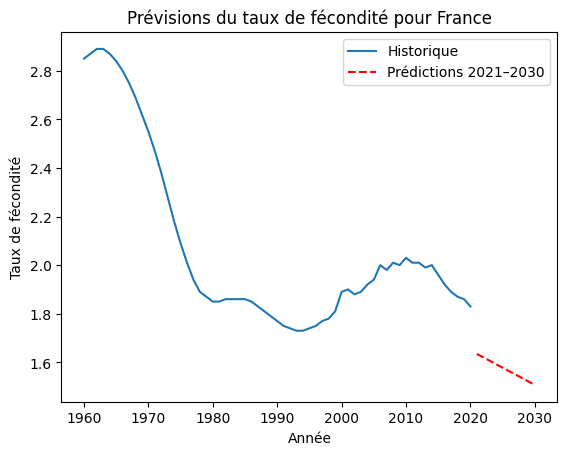

   Year  Predicted Fertility Rate
0  2021                  1.634475
1  2022                  1.620305
2  2023                  1.606134
3  2024                  1.591963
4  2025                  1.577792
5  2026                  1.563621
6  2027                  1.549451
7  2028                  1.535280
8  2029                  1.521109
9  2030                  1.506938


In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger ton fichier
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Choisir un pays (ex: France)
country = "France"
y = df[df["Country"] == country].drop("Country", axis=1).values.flatten()
years = np.arange(1960, 2021).reshape(-1, 1)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(years, y)

# Prédictions pour 2021–2030
future_years = np.arange(2021, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

# Affichage
plt.plot(years, y, label="Historique")
plt.plot(future_years, future_preds, "r--", label="Prédictions 2021–2030")
plt.xlabel("Année")
plt.ylabel("Taux de fécondité")
plt.title(f"Prévisions du taux de fécondité pour {country}")
plt.legend()
plt.show()

# Résultats numériques
pred_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted Fertility Rate": future_preds})
print(pred_df)


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>

Le graphique montre l’évolution du taux de fécondité en France entre 1960 et 2020. On observe une baisse régulière : dans les années 1960, les femmes avaient en moyenne près de cinq enfants, tandis qu’en 2020 ce chiffre est tombé autour de deux enfants et demi. Cette tendance traduit la transition démographique mondiale, liée à l’urbanisation, à l’éducation et à l’accès à la contraception.

La courbe rouge en pointillés représente les prédictions pour la décennie 2021–2030. Elle prolonge la tendance historique et indique que le taux de fécondité en France devrait continuer à diminuer légèrement. D’ici 2030, le monde se rapprocherait du seuil de deux enfants par femme, qui correspond au renouvellement de la population.

En résumé, le graphique illustre une baisse historique de la fécondité et projette une poursuite de cette baisse dans les années à venir, avec un monde qui converge vers un niveau bas et stable.

<span style="background-color: black">→ **Prévisions du taux de fécondité mondial (2021–2030)**</span>


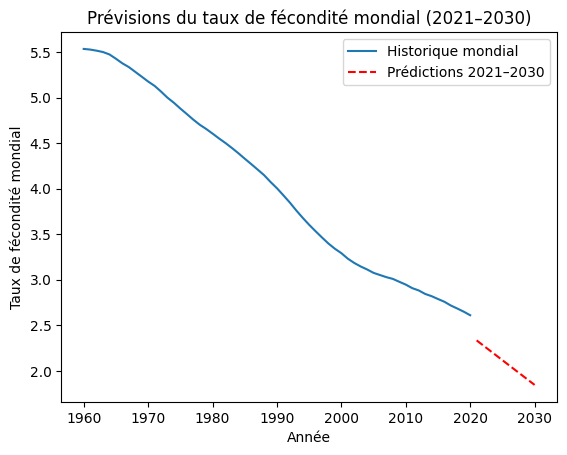

   Year  Predicted Fertility Rate
0  2021                  2.334691
1  2022                  2.280378
2  2023                  2.226065
3  2024                  2.171751
4  2025                  2.117438
5  2026                  2.063125
6  2027                  2.008811
7  2028                  1.954498
8  2029                  1.900185
9  2030                  1.845872


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Charger ton fichier
df = pd.read_csv("../data/raw/fertility_rate.csv")

# Calculer la moyenne mondiale par année (1960–2020)
years = df.columns[1:]  # toutes les colonnes sauf "Country"
world_series = df[years].mean()

# Préparer les données
X = np.array(years.astype(int)).reshape(-1, 1)
y = world_series.values

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions pour 2021–2030
future_years = np.arange(2021, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

# Affichage
plt.plot(X, y, label="Historique mondial")
plt.plot(future_years, future_preds, "r--", label="Prédictions 2021–2030")
plt.xlabel("Année")
plt.ylabel("Taux de fécondité mondial")
plt.title("Prévisions du taux de fécondité mondial (2021–2030)")
plt.legend()
plt.show()

# Résultats numériques
pred_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted Fertility Rate": future_preds})
print(pred_df)


<span style="background-color: yellow; color: black"><b>Remarque :</b></span>


Le graphique montre l’évolution du taux de fécondité mondial entre 1960 et 2020. On observe une baisse régulière : dans les années 1960, les femmes avaient en moyenne près de cinq enfants, tandis qu’en 2020 ce chiffre est tombé autour de deux enfants et demi. Cette tendance traduit la transition démographique mondiale, liée à l’urbanisation, à l’éducation et à l’accès à la contraception.

La courbe rouge en pointillés représente les prédictions pour la décennie 2021–2030. Elle prolonge la tendance historique et indique que le taux de fécondité mondial devrait continuer à diminuer légèrement. D’ici 2030, le monde se rapprocherait du seuil de deux enfants par femme, qui correspond au renouvellement de la population.

En résumé, le graphique illustre une baisse historique de la fécondité et projette une poursuite de cette baisse dans les années à venir, avec un monde qui converge vers un niveau bas et stable.

-------------------------------------------------------------------------------------------------------------------------------------------

**Brouillon**


📊 Résumé du modèle Random Forest :
➡️ RMSE (erreur moyenne)   : 0.035
➡️ R² (variance expliquée) : 0.991


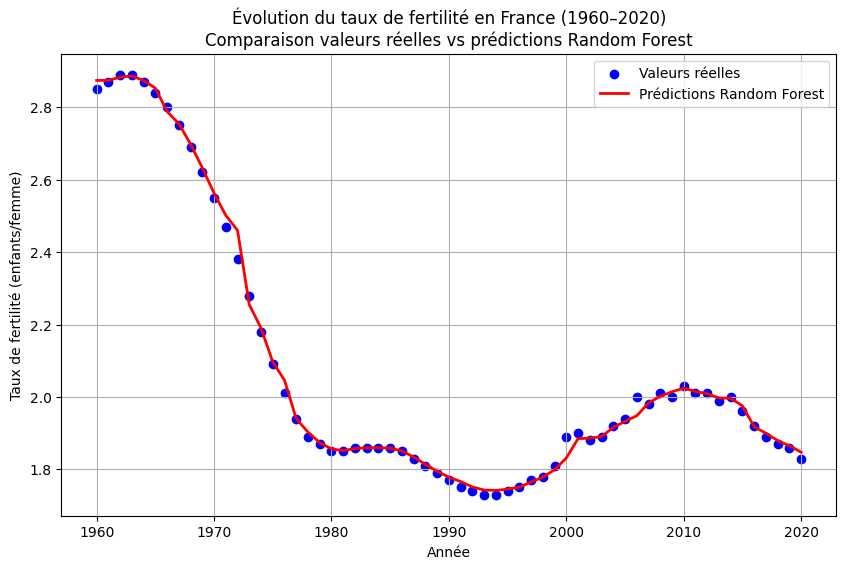

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
# 🇫🇷 Filtrer uniquement la France (1960–2020)
# ============================================================
df_france = df_long[(df_long["Country"] == "France") & 
                    (df_long["Year"].between(1960, 2020))].copy()

X = df_france[["Year"]]
y = df_france["FertilityRate"]

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================================
# 🌲 Modèle Random Forest
# ============================================================
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("\n📊 Résumé du modèle Random Forest :")
print("="*60)
print(f"➡️ RMSE (erreur moyenne)   : {rmse:.3f}")
print(f"➡️ R² (variance expliquée) : {r2:.3f}")
print("="*60)

# ============================================================
# 📈 Graphique comparatif
# ============================================================
plt.figure(figsize=(10,6))

# Valeurs réelles
plt.scatter(df_france["Year"], df_france["FertilityRate"], color="blue", label="Valeurs réelles")

# Prédictions du modèle (sur toute la période)
years_sorted = np.array(sorted(df_france["Year"])).reshape(-1,1)
predictions_sorted = model_rf.predict(years_sorted)
plt.plot(years_sorted, predictions_sorted, color="red", linewidth=2, label="Prédictions Random Forest")

# Mise en forme
plt.title("Évolution du taux de fertilité en France (1960–2020)\nComparaison valeurs réelles vs prédictions Random Forest")
plt.xlabel("Année")
plt.ylabel("Taux de fertilité (enfants/femme)")
plt.legend()
plt.grid(True)
plt.show()
